##**Modeling Employee Attrition Basing on the "IBM HR Analytics Employee Attrition & Performance" dataset"** (link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset)

Dataset download link: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/download/SclMpCPJ71KvOVvotRub%2Fversions%2FoQOP4jwdgjF4RlL2riqk%2Ffiles%2FWA_Fn-UseC_-HR-Employee-Attrition.csv?datasetVersionNumber=1

####**Executive summary**

In this project we focused on exploring the modeling of employee attrition basing on an artificial dataset provided by IBM. 

*   As a first step, the exploratory data analysis was applied to the dataset. It showed the sets of values of categorical variables in the dataset, as well as the dataset shape, the data types and the existance of missing values.
*   One of the steps of exploratory staristics showed that the set of values in the target variable "Attrition" is imbalanced, with 237 outcomes of "Yes" and 1233 outcomes of "No"
* As a first step of modeling analytics, random forest, logistic regression and KNN algorithms were fitted to the original version of data, in order to have a baseline for further analysis and have an understanding of the potential values of accuracy and recall that are possible to achieve
* Furthermore, two versions of the random forest algorithm (with and without the highly correlated variables) was used to estimate the factors that are most contributing to the variations in attrition
* As a second step, the synthetic minority oversampling technique (SMOTE) was applied to the data, in order to address the issue of strongly unbalanced classes of the target variable
* Further, the techniques of linear and non-linear SVC, gradient boosting and random forest with SMOTE were fitted on the data
*  The results were evaluated basing on the differences between the training and testing accuracies (the lower this difference, the better), and the values of recall for "yes" attrition, as they are more helpful for predicting attrition in this case than the models with overall high accuracy
* The lowest difference between the testing and training scores, as well as the best value of recall, was eventually associated with the gradient boosting model. It was closely followed by the linear SVC in each of these two indicators. 
* Gradient boosting model highlights the monthly and hourly rates, as well as the monthly income as the top three indicators contributing to the variation in attrition. At the same time, the linear SVC rates the presence of overtimes, frequent business travel and the dummy variable for being a sales representative as the features of highest contribution to different attrition rates. 
* As a last point of the research process, the data limitations inherent to the dataset were mentioned. Some of them are the fact that it was collected artificially, does not distinguish between different reasons for attrition, as well as that it lacks a temporal component and therefore is not necessarily useful to predict attrition of future periods in time.



####**Introduction**

The problem of employee attrition is one of the key focuses of modern human resource management for a number of reasons. First of all, negative trends in attrition produce excessive costs and time strains towards the training of new employees. Secondly, the associated problem of losing experienced workers can mean a negative shift in the balance of available human resources, and have a subsequent unfavorable impact on the variables of both corporate profits and corporate productivity. For this reason, machine learning approaches to modeling and predicting the trends of employee attrition can prove to be a cost-effective method of planning and optimizing the HR strategies of companies. 

In the current project, we attempted to explore the modeling of employee attrition basing on a set of machine learning methodologies and try to find the ones giving the most useful and reliable predictions. 

####**1. Exploring the data**

**Importing the necessary packages:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
import warnings
import timeit
warnings.filterwarnings('ignore');

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


**As the first step of the analysis, the IBM data on employee attrition was imported from an external source:**

In [5]:
url = '/content/ibm.csv'
df = pd.read_csv(url , sep = ',')
print("Shape of the input data {}".format(df.shape))

Shape of the input data (1470, 35)


**The shape of the dataframe is explored in order to ensure that the data was loaded properly:**

In [6]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,Male,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [0]:
target_unencoded = df['Attrition']

**Checking for the presence of missing values (none are identified):**

In [17]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [15]:
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [14]:
#Checking the unique values of categorical variables
for col in df.select_dtypes(['object']).columns:
    print(col, ':', sorted(df[col].unique()))

Attrition : ['No', 'Yes']
BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department : ['Human Resources', 'Research & Development', 'Sales']
EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender : ['Female', 'Male']
JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus : ['Divorced', 'Married', 'Single']
OverTime : ['No', 'Yes']


**Checking the histograms of the numerical variables:**

* This step helps to get a better idea of how the numerical variables of the dataset are distributed. For instance, from the histograms we can now see that education and age of the employees are reasonably close to a normal distribution, with a slight skew to the right for the case of age, and a small skew to the left for the case of education.  

* At the same time, it can also be noticed that the daily, hourly and monthly rates have a roughly equal distribution accross different values, and nearly all of the values are distinct. This situation is rather hard to imagine in real life, and is probably one of the reflections of teh fact that the dataset is artificial.

* Similarly, it is possible to see that each of the 1470 employees of the company has either "Excellent" or "Outstanding" performance rating, without a single exception, which in real life would probably mean an imperfect system of performance management that should be reconsidered.

* From the distribution of the "Employee count" and "Standard hours" variables we can see that their values are fixed, meaning that they should be removed prior to conducting the further stages of analysis. 

* Lastly, one can also see that the variables of job level, percent salary hike, total working years and monthly income are skewed to the right, which is exactly the pattern that can be expected in real life data

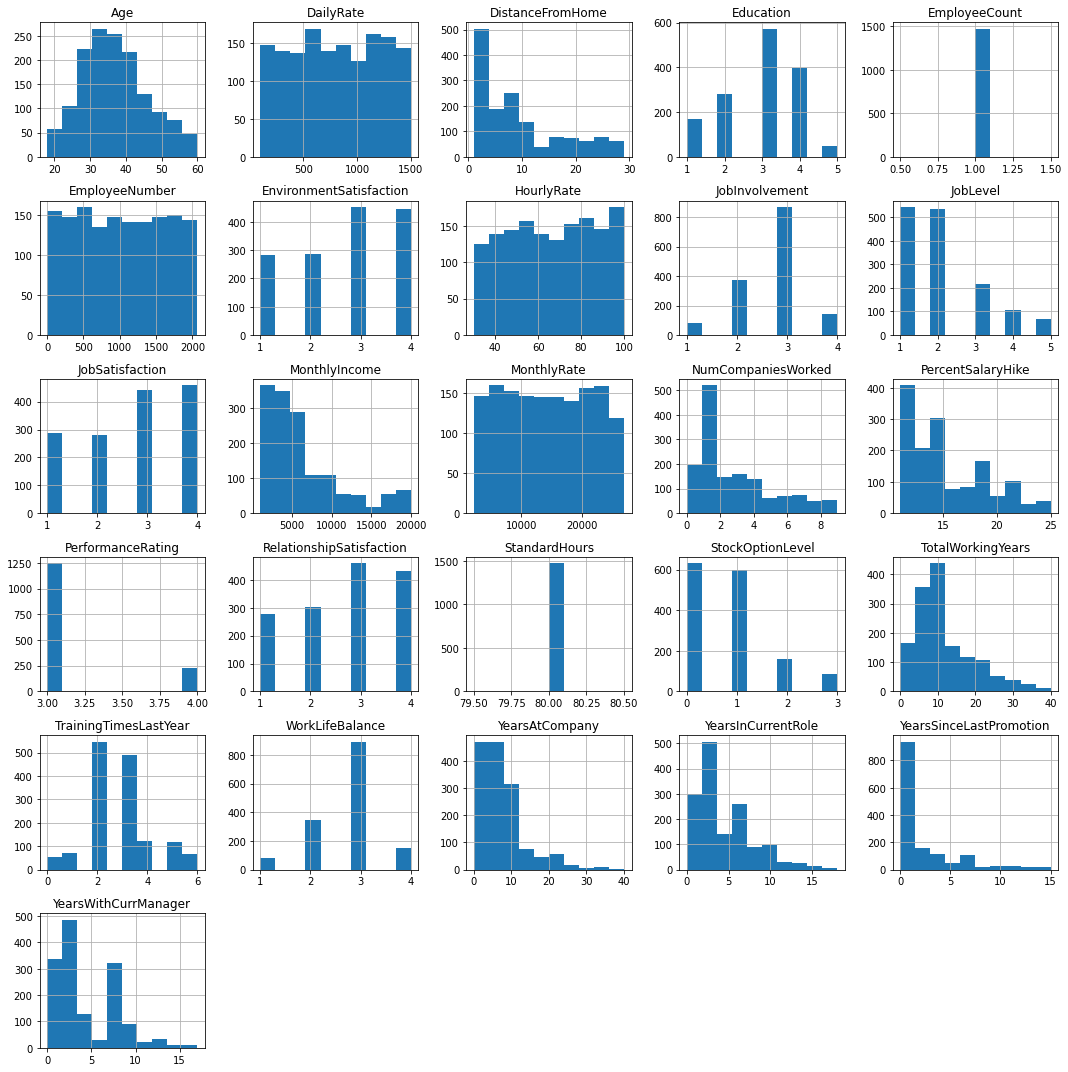

In [7]:
pd.DataFrame.hist(df, figsize = (15,15))
plt.tight_layout()
plt.show();

**Looking at the counts of the two value options for attrition (the count of the "No" class of the target variable is substantially higher):**

Text(0.5, 1.0, 'Counts of attrition')

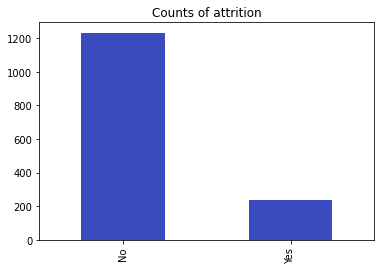

In [18]:

pd.value_counts(target_unencoded).plot(kind = 'bar',cmap = 'coolwarm')
plt.title("Counts of attrition")

**A more detailed graph of the age variable once again shows that the distribution is close to normal:**

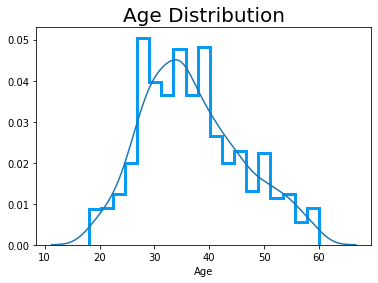

In [12]:
#Looking at the age distribution in the dataset
sns.distplot(df.Age, kde=True, label='YearsInCurrentRole', hist_kws={"histtype": "step", "linewidth": 3,
                  "alpha": 1, "color": sns.xkcd_rgb["azure"]})
plt.title('Age Distribution', fontsize=20)      
plt.show()

**At the next step, we try to visually explore if there exists any difference in attrition basing on the employee ages:**

Judging from the plot, retained employees have their age distribution shifted to the right, as compared to the non-retained sample participants. 

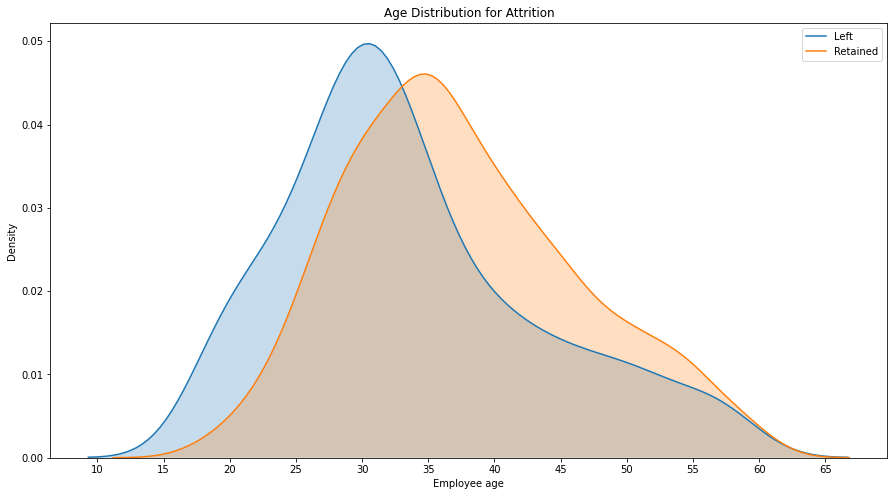

In [8]:
f,ax = plt.subplots(figsize=(15,8))
sns.kdeplot(df.loc[df.Attrition == "Yes", "Age"], shade = True, label = "Left")
sns.kdeplot(df.loc[df.Attrition == "No", "Age"], shade = True, label = "Retained")
ax.set(xlabel = "Employee age", ylabel = "Density",title = "Age Distribution for Attrition")
ax.set_xticks(range(10, 70, 5))
plt.show()

**Plotting continuous variables of the dataset with separation of classes of the target variable:**

From the resulting visualization it is hard to conclude on the specific patterns of how the selected continuous variables are influencing attrition. Therefore, the use of machine learning algorithms should be more appropriate in this case than simply analyzing the descriptive statistics. 

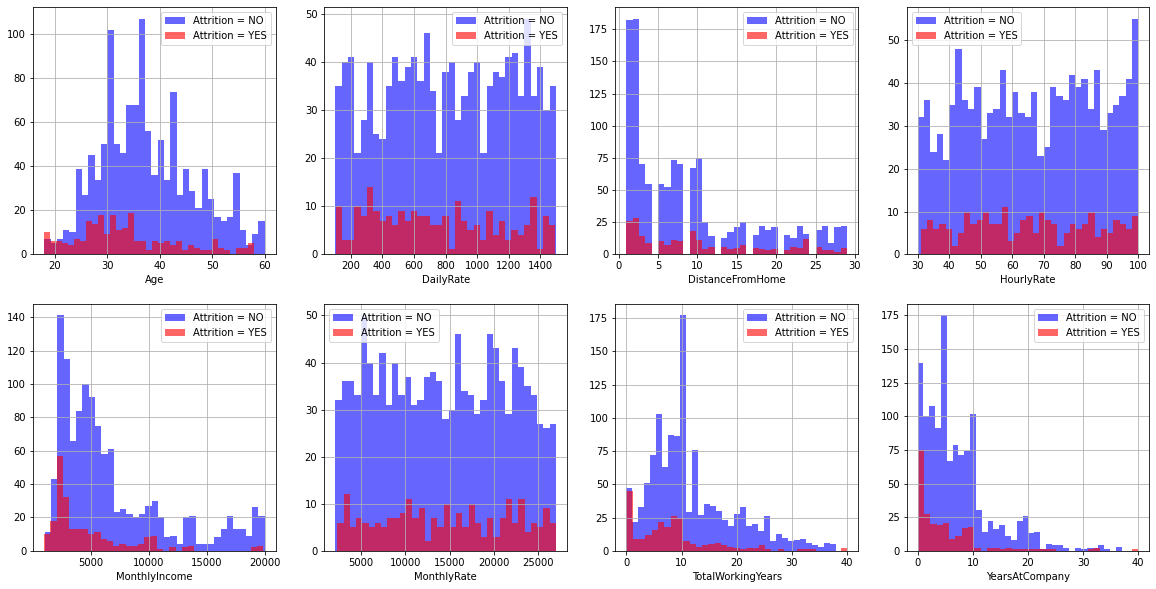

In [32]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 25:
        ("")
        cont_col.append(column)
        (" ");
plt.figure(figsize=(20, 10))
for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    df[df["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

**Deleting the redundant variables that are not related to the analysis:**

In [0]:
if 'EmployeeNumber' in df:
    del df['EmployeeNumber']
    
if 'EmployeeCount' in df:
    del df['EmployeeCount']
    
if 'StandardHours' in df:
    del df['StandardHours']
    
if 'Over18' in df:
    del df['Over18']

**Checking the correlations heatmap:**

From the heatmap below we see the perfect (1.0) correlation between the monthly income and job level, as well as the close to perfect (0.8) correlation of these latter variables with the indicator of the total working hours. These correlations seem intuitively reasonable, and reflect a real life situation of typical companies. Furthermore, there is also a rectangle cluster of relatively high correlations in the lower right corner of the heatmap, which shows the associations between the variables of years at the company, years at the current role, years with the current manager, and years since promotion. 

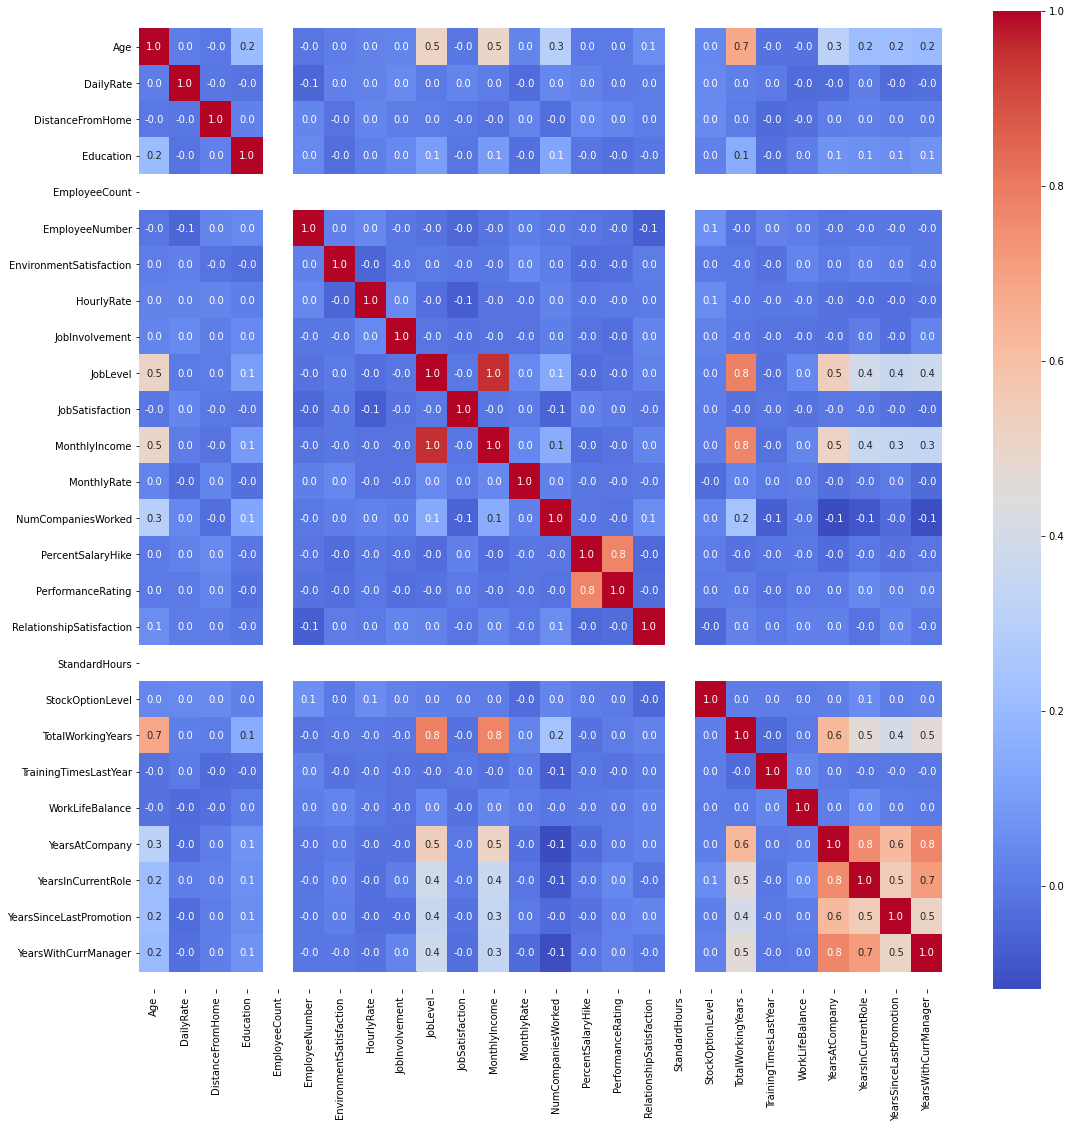

<Figure size 1296x1296 with 0 Axes>

In [9]:

f,ax = plt.subplots(figsize=(18, 18))
correlations = df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(correlations, fmt= '.1f',annot=True,ax=ax, cmap='coolwarm')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

###**2. Exploring some basic models without rebalancing**

In this part of the report, we perform some first steps in fitting machine learning algorithms to the IBM dataset. First of all, we explore the factors most influencing attrition under different setups with the help of the Random forest classifier. Further, the instruments of the logistic regression, KNN and linear SVC are also fitted to the data. This is mainly done as a baseline and reference point for further analysis with the help of the SMOTE oversampling procedure, that is more relevant for treating unbalanced data. 

**Encoding the categorical variable of Attrition:**

In [19]:

labelencoder = LabelEncoder()
target = labelencoder.fit_transform(target_unencoded)
print(target)

[1 0 1 ... 0 0 0]


In [20]:
features = df[df.columns.difference(['Attrition'])]
output = df.iloc[:, 1]
output

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

**Defining the set of numerical and categorical features:**

In [21]:

categorical = []
for col, value in features.iteritems():
    if value.dtype == 'object':
        categorical.append(col)
numerical = features.columns.difference(categorical)
print(categorical)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


**Checking the encoding of categorical features:**

In [22]:

features_categorical = features[categorical]
features_categorical = pd.get_dummies(features_categorical, drop_first=True)
features_categorical.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


**Checking the numerical features:**

In [23]:
features_numerical = features[numerical]
features = pd.concat([features_numerical, features_categorical], axis=1)
features.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


**Checking the shape of the numerical features:**

In [24]:
target_unencoded = df['Attrition']
train = features_numerical
train.shape

(1470, 23)

#### **2.1. Random forest classifiers and SVC**

**Performing the train-test split:**

In [0]:
train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(
    train.drop(['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion','YearsWithCurrManager'],axis=1), target, test_size = 0.3, random_state=0)

Top 10 Features: ['MonthlyIncome', 'TotalWorkingYears', 'Age', 'JobLevel', 'StockOptionLevel', 'DailyRate', 'WorkLifeBalance', 'EnvironmentSatisfaction', 'JobInvolvement', 'HourlyRate']
Accuracy on Training set: 0.8396501457725948
Accuracy on Test set: 0.8412698412698413
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



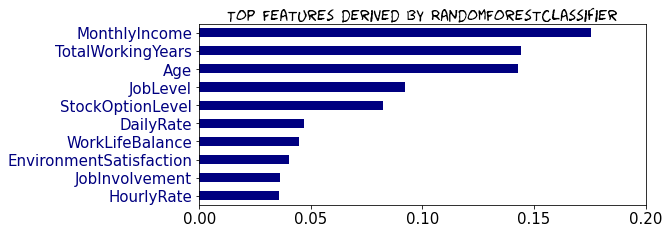

In [0]:
#X, y = features.copy(), df["Attrition"].copy()

n = 10    
rfc = RandomForestClassifier(random_state=0, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X_train, Y_train)
pd.Series(rfc_model.feature_importances_, index=X_train.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()   
ticks_x = np.linspace(0, 0.2, 5)   
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top10_features = pd.Series(rfc_model.feature_importances_, index=X_train.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

print('Accuracy on Training set: {}'.format(rfc_model.score(X_train,Y_train)))
print('Accuracy on Test set: {}'.format(accuracy_score(Y_test, rfc_model.predict(X_test) )))
print("="*80)
print(classification_report(Y_test, rfc_model.predict(X_test)))

As it can be seen from the plot above, monthly income, total working years and age serve as the key contributing factors of attrition, in the case if unscaled data is considered. However, given that very few variables of the dataset have close to normal distributions, the use of robust scaling has a potential to improve the quality of the analysis. 

**Robust scaling to account for non-normally distributed data:**

In [0]:
rs = RobustScaler()
features_train_scaled = rs.fit_transform(X_train)
features_test_scaled = rs.transform(X_test)

**Defining a function to print the accuracy of the model:**

In [0]:
def print_accur(classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Accuracy is equal to " + str(accuracy_score(y_test, y_pred) * 100) + "%") 

**Checking the accuracy of the selected model:**

In [0]:
svc = SVC(kernel = 'rbf', random_state = 0, gamma='auto')
svc_pred = print_accur(svc, features_train_scaled, features_test_scaled, Y_train, Y_test)

Accuracy is equal to 84.12698412698413%


**Alternatively, the random forest model above can also be conducted by eliminating the set of highly correlated variables, which has a positive impact on accuracy (in this case, the least correlated numerical variables are selected into the updated df_uc dataframe):**

In [0]:
df_uc = features_numerical[['Age','DailyRate','DistanceFromHome', 
                       'EnvironmentSatisfaction', 'HourlyRate',                     
                       'JobInvolvement', 'JobLevel','JobSatisfaction', 
                       'RelationshipSatisfaction', 'StockOptionLevel',
                        'TrainingTimesLastYear']].copy()

In [0]:
df_uc.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [0]:
df_cat = df[['Attrition', 'BusinessTravel','Department',
                       'EducationField','Gender','JobRole','MaritalStatus', 'OverTime']].copy()
Num_val = {'Yes':1, 'No':0}
df_cat['Attrition'] = df_cat["Attrition"].apply(lambda x: Num_val[x])
df_cat = pd.get_dummies(df_cat)
df_final = pd.concat([df_uc, df_cat], axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,94,3,2,4,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,3,61,2,2,2,4,1,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,4,92,2,1,3,2,0,3,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,56,3,1,3,3,0,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,40,3,1,2,4,1,3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0


**Setting up the updated version of the model:**

In [0]:
from sklearn.model_selection import train_test_split
X_fe = df_final.drop('Attrition', axis = 1)
y_fe = df_final['Attrition']
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.3, random_state=0)

In [0]:
from sklearn.ensemble import RandomForestClassifier
model_fe = RandomForestClassifier()
model_fe.fit(X_train_fe,y_train_fe);

In [0]:
from sklearn.metrics import accuracy_score

test_pred_fe = model_fe.predict(X_test_fe)
accuracy_score(y_test_fe, test_pred_fe)

print('The accuracy score is: {}'.format(accuracy_score(y_test_fe, test_pred_fe)* 100))

The accuracy score is: 87.3015873015873


In [0]:
print('Accuracy on Training set: {}'.format(model_fe.score(X_train_fe,y_train_fe)))
print('Accuracy on Test set: {}'.format(accuracy_score(y_test_fe, test_pred_fe)))
print("="*80)
print(classification_report(y_test_fe, test_pred_fe))

Accuracy on Training set: 1.0
Accuracy on Test set: 0.873015873015873
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       371
           1       0.85      0.24      0.38        70

    accuracy                           0.87       441
   macro avg       0.86      0.62      0.65       441
weighted avg       0.87      0.87      0.84       441



The plot of factor importance below shows that the ranking of the most contributing features changed with the elimination of the most correlated features and scaling. For instance, the monthly income, that was previously ranked third in importance, is now not in the top 10. However, such factors as age, daily and hourly rates, job involvement, environment satisfaction and job level are still ranked among the ten of the most important.

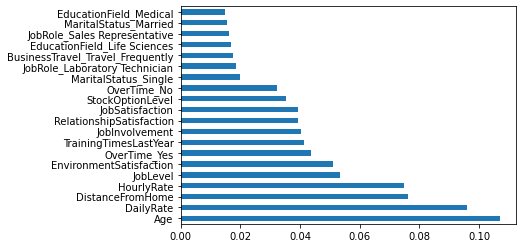

In [0]:
feat_importances = pd.Series(model_fe.feature_importances_, index= X_fe.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh');

####**2.2. Logistic regression:**

In [0]:
x = np.asarray(features) 
y = np.asarray(target)
from sklearn import preprocessing 
x = preprocessing.StandardScaler().fit(x).transform(x) 
x[:5]
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=4) 
print('Train set:  ', x_train.shape, y_train.shape) 
print('Test set: ', x_test.shape, y_test.shape)

Train set:   (882, 44) (882,)
Test set:  (588, 44) (588,)


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)  
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
yhat = LR.predict(x_test)
print("Accuracy with selected features: " + str(accuracy_score(y_test, yhat) * 100) + "%")

Accuracy with selected features: 88.09523809523809%


In [0]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.99      0.93       498
           1       0.79      0.30      0.44        90

    accuracy                           0.88       588
   macro avg       0.84      0.64      0.68       588
weighted avg       0.87      0.88      0.86       588



####**2.3. KNN classifier:**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy with selected features: " + str(accuracy_score(y_test, y_pred) * 100) + "%")

Accuracy with selected features: 84.01360544217688%


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       498
           1       0.44      0.17      0.24        90

    accuracy                           0.84       588
   macro avg       0.65      0.56      0.58       588
weighted avg       0.80      0.84      0.81       588



The accuracies of the logistic regression and the KNN algorithms are 88.09 and 84.01, respectively, which seem to be acceptable at first glance. However, the values of recall for the models are 0.30 for the logistic regression and 0.17 for the KNN, which means that they are not truly well fitten to predict positive values of attrition (which is most important for this task). 

###**3. Oversampling using SMOTE**

There is a clear class imbalance in the training dataset, where the the number of employees with "yes" in attrition (further referred to as exhausted) represent only 16% of the values. In such case, increasing the number of the underrepresented class values is suggested to improve the accuracy of the model. SMOTE oversampling was implemented to account for the class imbalance, where the number of positive class values was doubled. It was noticed that if the positive class values were more than doubled, the accuracy of all the models dropped considerably.

In [0]:
# splitting the dataset into train and test sets with a test size of 20%
# the highly correlated variables are removed from the features
X_train, X_test, Y_train, Y_test = train_test_split(
    features.drop(['YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion','YearsWithCurrManager'],axis=1), target, test_size = 0.2, random_state=0)
features_train_scaled = rs.fit_transform(X_train) #fitting a robust scaler and transforming X_train
features_test_scaled = rs.transform(X_test) # transforming the test features using a robust scaler

In [0]:
# Number of classes in the train set before oversampling
pd.Series(Y_train).value_counts()

0    988
1    188
dtype: int64

In [0]:

# This function doubles the ratio of the positive class
def ratio_multiplier(y):
    """This function doubles the ratio of the positive class.
    Enter this function as a sampling_strategy in RandomOverSampler"""
    multiplier = {1:2}
    target_stats = Counter(y)
    for key, value in target_stats.items():
        if key in multiplier:
            target_stats[key] = int(value * multiplier[key])
    return target_stats

# somte_train are the features and smote_target is the target variable
smote_train, smote_target = RandomOverSampler(sampling_strategy = ratio_multiplier, random_state=0).fit_resample(features_train_scaled, Y_train)

In [0]:
# Number of classes in the train set after oversampling
pd.Series(smote_target).value_counts()

0    988
1    376
dtype: int64

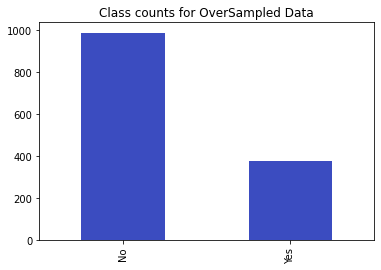

In [0]:
pd.value_counts(smote_target).plot(kind= 'bar',cmap = 'coolwarm')
plt.xticks(ticks=[0,1],labels=['No', 'Yes'])
plt.title('Class counts for OverSampled Data')
plt.show();

**Applying a Random forest classifier on the oversampled data with 700 estimators and max tree depth of 6:**


According to the feature importance from Random Forest Classifier, the most important features that affect whether an employee is exhausted are shown in the figure below.

In [0]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=0 )
params = {'n_estimators': np.arange(100,1300,100), 'max_depth': np.arange(1,10,1)}
start_time = timeit.default_timer()
gs_rfc = GridSearchCV(rfc, param_grid=params,cv=3, scoring='recall_micro' )
rfc_model_2 = gs_rfc.fit(smote_train, smote_target)

In [0]:
#gs_rfc.best_params_  #Uncomment to print the best parameters

In [0]:
rfc = RandomForestClassifier(random_state=0, n_estimators=700, max_depth=6 )
start_time = timeit.default_timer()
rfc_model_2 = rfc.fit(smote_train, smote_target)
rf_predictions = rfc_model_2.predict(features_test_scaled)
time_rf = timeit.default_timer() - start_time

n= 10 #Uncomment to plot the top 10 features
#pd.Series(rfc_model_2.feature_importances_, index=X_train.columns).nlargest(n).plot(kind='barh', 
#    figsize=[8, n/3], color='navy').invert_yaxis()   #Uncomment to plot the top 10 features
#ticks_x = np.linspace(0, 0.2, 5)  #Uncomment to plot the top 10 features 
#plt.xticks(ticks_x, fontsize=15, color='black')  #Uncomment to plot the top 10 features
#plt.yticks(size=15, color='navy' )     #Uncomment to plot the top 10 features
#plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)   #Uncomment to plot the top 10 features
#top10_features = pd.Series(rfc_model_2.feature_importances_, index=X_train.columns).nlargest(10)   #Uncomment to plot the top 10 features
#print('Top 10 Features:', list(top10_features.index))    #Uncomment to plot the top 10 features

In our case, we don't want someone who is actually exhausted to be predicted not exhausted
 And so we should focus on maximizing the recall of the positive class.
 However, a Random Forest Classifier has yielded a small recall value of 0.22. Hence, other algorithms will be tried out.

In [0]:
print('Accuracy score on Training set: {}'.format(rfc_model_2.score(smote_train, smote_target)))
print("Accuracy score on Test Set: {}".format(accuracy_score(Y_test, rf_predictions)))
print("="*80)
print(classification_report(Y_test, rf_predictions))

Accuracy score on Training set: 0.8914956011730205
Accuracy score on Test Set: 0.8469387755102041
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       245
           1       0.67      0.16      0.26        49

    accuracy                           0.85       294
   macro avg       0.76      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294



####**3.1. Gradient Boosting Model**

**Fitting a gradient boosting classifier on the oversampled training data:**

In [0]:
gb_params ={
    'n_estimators': 500,
    'max_features': 0.9,
    'learning_rate' : 1.68,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 0,
    'verbose': 0
}

gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
start_time = timeit.default_timer()
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(features_test_scaled)
time_gb = timeit.default_timer() - start_time

In [0]:
print('Accuracy score on Training set: {}'.format(np.mean(gb.score(smote_train, smote_target))))
print('Accuracy score on Test set: {}'.format(accuracy_score(Y_test, gb_predictions)))
print("="*80)
print(classification_report(Y_test, gb_predictions))

Accuracy score on Training set: 0.6107038123167156
Accuracy score on Test set: 0.6054421768707483
              precision    recall  f1-score   support

           0       0.88      0.61      0.72       245
           1       0.23      0.59      0.33        49

    accuracy                           0.61       294
   macro avg       0.56      0.60      0.53       294
weighted avg       0.77      0.61      0.66       294



In [0]:
importance = gb.feature_importances_
xlabels = X_train.columns.values

y = importance[np.argsort(importance)][-10:] # largest 10 coefficients
x = xlabels[np.argsort(importance)[-10:]] # labels of largest 10 coefficients

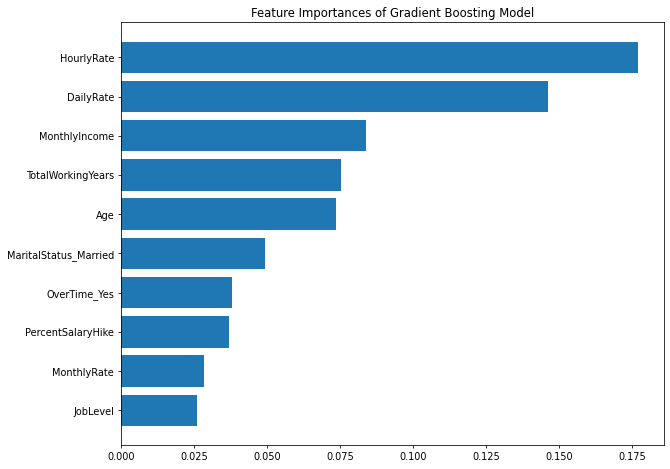

In [0]:
plt.figure(figsize=(10,8),dpi=70)
plt.barh(y=x, width=y)
plt.title('Feature Importances of Gradient Boosting Model');

**Feature Selection using Extra Tree Classifier**


The important features obtained from Extra Tree Classifier are fed into 
Select_from_model function where the important features are further selected based on the mean of the coefficients. Features greater than or equal to the mean of the coefficients are used to train a linear SVC.

In [0]:
# fitting Extra Tree Classifier
et = ExtraTreesClassifier(n_estimators=400, max_depth= 5, criterion='entropy', random_state=0)
et.fit(smote_train, smote_target)

# Selecting important features
model = SelectFromModel(et, prefit=True)
new_features = model.transform(smote_train)

start_time = timeit.default_timer() # timing the training time for SVC
et_svc = SVC(C=10,kernel='linear', random_state=0) # fitting linear SVC
et_svc.fit(new_features, smote_target)
new_features_test = model.transform(features_test_scaled) # transforming test data based on the features selected by Extra Tree Classifier
et_predictions = et_svc.predict(new_features_test) # predicting the transformed test data
time_et_svc = timeit.default_timer() - start_time

print('Number of features selected using Extra Tree Classifier: {} out of {}'.format(new_features.shape[1], smote_train.shape[1]))

Number of features selected using Extra Tree Classifier: 12 out of 40


In [0]:
print('Accuracy score on Training set: {}'.format(np.mean(et_svc.score(new_features, smote_target))))
print('Accuracy score on Test set: {}'.format(accuracy_score(Y_test, et_predictions)))
print("="*80)
print(classification_report(Y_test, et_predictions))

Accuracy score on Training set: 0.7932551319648093
Accuracy score on Test set: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       245
           1       0.60      0.37      0.46        49

    accuracy                           0.85       294
   macro avg       0.74      0.66      0.69       294
weighted avg       0.84      0.85      0.84       294



**Plotting the 10 largets coefficients chosen by Extra Tree Classifier and linear SVC:**

Get the mean of the coefficient since Select_from_model function choses the coefficients with values equal and greater than the mean.

In [0]:
print('The mean of the feature importances: ',np.mean(et.feature_importances_))

The mean of the feature importances:  0.025


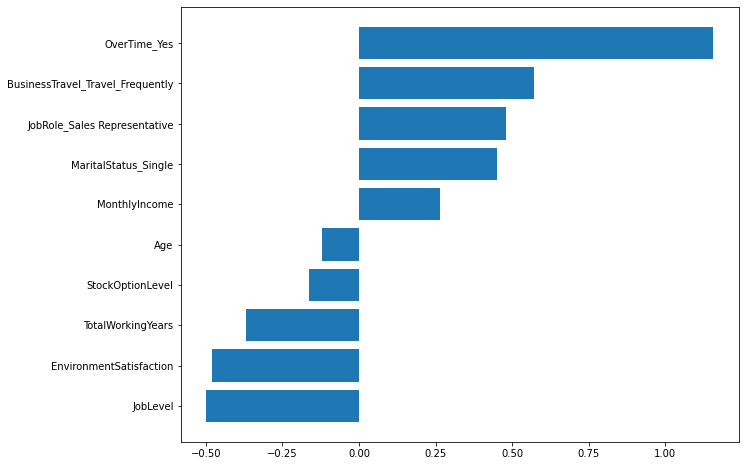

In [0]:
et_feat = et.feature_importances_ # feature importance according to Extra Tree Classifier
et_feat_index = np.where(et_feat >= np.mean(et.feature_importances_)) #index of feature importance chosen by Select_from_model() function
x_labels = X_train.columns.values[et_feat_index] # labels of the coefficients chosen by Select_from_model() function
impotrtance_et_svc_labels = x_labels[np.argsort(et_svc.coef_[0])[-10:]] # labels of largest 10 important features from et_svc
importance_et_svc = sorted(et_svc.coef_[0])[-10:] # largest 10 coefficients from et_svc

plt.figure(figsize=(10,8))
plt.barh(y=impotrtance_et_svc_labels, width=importance_et_svc);

####**3.2. Linear SVC**

In [0]:
linear_svc = SVC(C=1,kernel='linear', random_state=0)
start_time = timeit.default_timer()
linear_svc.fit(smote_train, smote_target)
linear_svc_predictions = linear_svc.predict(features_test_scaled)
time_lsvc = timeit.default_timer() - start_time

In [0]:
print('Accuracy on Training set: {}'.format(linear_svc.score(smote_train, smote_target)))
print('Accuracy on Test set: {}'.format(accuracy_score(Y_test, linear_svc_predictions)))
print("="*80)
print(classification_report(Y_test, linear_svc_predictions))

Accuracy on Training set: 0.8409090909090909
Accuracy on Test set: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       245
           1       0.60      0.57      0.58        49

    accuracy                           0.86       294
   macro avg       0.76      0.75      0.75       294
weighted avg       0.86      0.86      0.86       294



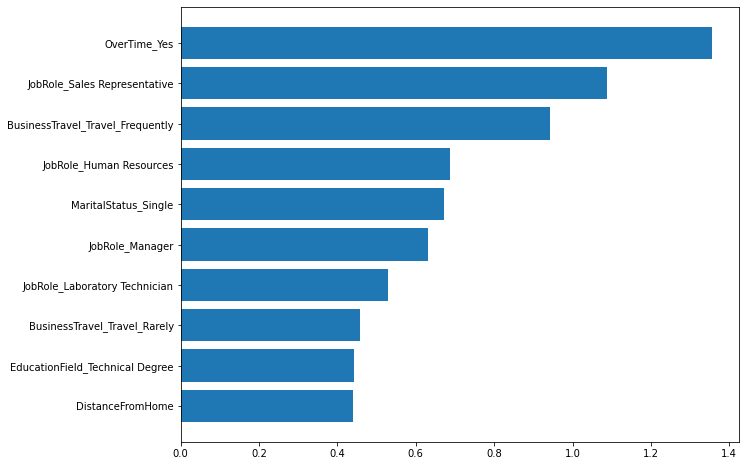

In [0]:
linear_svc_coef_labels = X_train.columns.values[np.argsort(linear_svc.coef_[0])[-10:]]
linear_svc_coef = sorted(linear_svc.coef_[0])[-10:]

plt.figure(figsize=(10,8))
plt.barh(y=linear_svc_coef_labels, width=linear_svc_coef);

#### **3.3. Non Linear SVC**

In [0]:
nlinear_svc = SVC(gamma=0.01,kernel='rbf', random_state=0)
start_time = timeit.default_timer()
nlinear_svc.fit(smote_train, smote_target)
nlinear_svc_predictions = nlinear_svc.predict(features_test_scaled)
time_nlsvc = timeit.default_timer() - start_time
print('Accuracy on Training set: {}'.format(nlinear_svc.score(smote_train, smote_target)))
print('Accuracy on Test set: {}'.format(accuracy_score(Y_test, nlinear_svc_predictions)))
print("="*80)
print(classification_report(Y_test, nlinear_svc_predictions))

Accuracy on Training set: 0.8379765395894428
Accuracy on Test set: 0.8877551020408163
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       245
           1       0.79      0.45      0.57        49

    accuracy                           0.89       294
   macro avg       0.84      0.71      0.75       294
weighted avg       0.88      0.89      0.87       294



#### **3.4. Plotting The recall values of all the models**

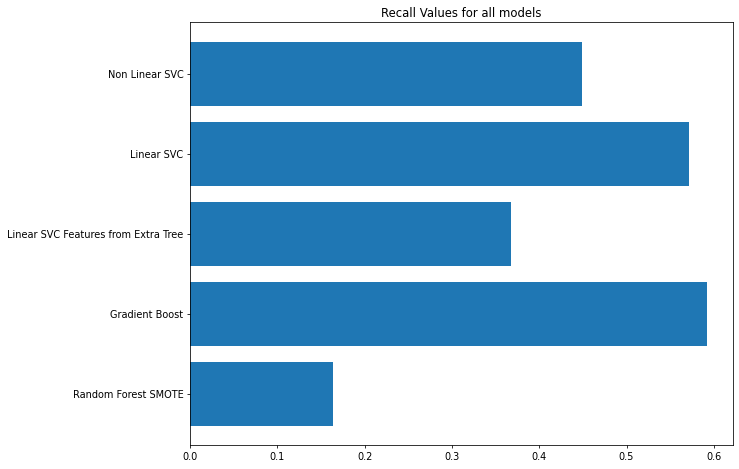

In [0]:
rec_scores = []
models = { 'Random Forest SMOTE':rfc_model_2, 
          'Gradient Boost': gb, 
          'Linear SVC Features from Extra Tree': et_svc ,'Linear SVC': linear_svc, 'Non Linear SVC': nlinear_svc}

for i in models.values():
    
    if i == et_svc:
        prediction = i.predict(new_features_test)
        rec_scores.append(recall_score(Y_test, prediction))  
    else:
        prediction = i.predict(features_test_scaled)
        rec_scores.append(recall_score(Y_test, prediction))
plt.figure(figsize=(10,8),dpi=70)
plt.barh(y=list(models.keys()), width=rec_scores)
plt.title('Recall Values for all models');

####**3.5. Plotting the differences between the training and test set accuracies**

The smaller the difference, the better the model

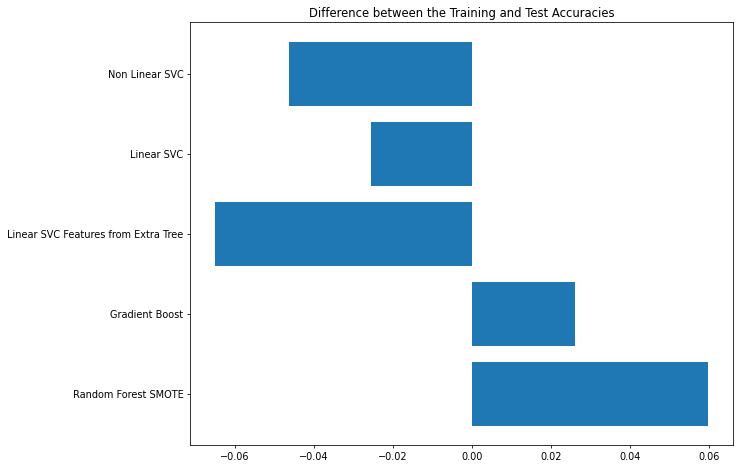

In [0]:
difference = []
models = { 'Random Forest SMOTE':rfc_model_2, 'Gradient Boost': gb, 
          'Linear SVC Features from Extra Tree': et_svc ,'Linear SVC': linear_svc, 'Non Linear SVC': nlinear_svc}

for i in models.values():
    
    if i == et_svc:
        prediction = i.predict(new_features_test)
        difference.append(i.score(new_features, smote_target)-accuracy_score(Y_test, prediction))
    
    else:
        prediction = i.predict(features_test_scaled)
        difference.append(i.score(smote_train, smote_target)-accuracy_score(Y_test, prediction))
plt.figure(figsize=(10,8),dpi=70)  
plt.barh(y=list(models.keys()), width=difference)
plt.title('Difference between the Training and Test Accuracies');

####**3.6. Plotting time consumed to train each model**

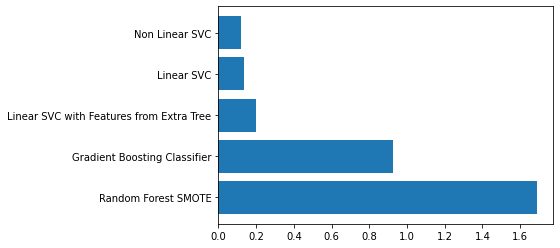

In [0]:
training_time = {'Random Forest SMOTE' : time_rf, 'Gradient Boosting Classifier': time_gb,
                 'Linear SVC with Features from Extra Tree': time_et_svc, 'Linear SVC': time_lsvc, 'Non Linear SVC': time_nlsvc}

plt.barh(y=list(training_time.keys()), width=list(training_time.values()));

**Resume:**

Summing up on the above analysis, one can see that the gradient boosting model is best in terms of both recall and the difference between the training and testing accuracies. It is closely followed by the linear SVC in each of these two indicators. Gradient boosting model highlights the monthly and hourly rates, as well as the monthly income as the top three indicators contributing to the variation in attrition. At the same time, the linear SVC rates the presence of overtimes, frequent business travel and the dummy variable for being a sales representative as the features of highest contribution to different attrition rates. 

## **Limitations of the analysis**

In order to see the takeouts of the analysis in a broader context, it is important to consider the limitations of the utilized dataset. For that end, the following points should be noted:
* First of all, it is worth mentioning that the types of models used in this assignment were primarily focused on distinguishing between the two populations - of churners and non-churners. However, they cannot be generalized for different time steps or predict the probabilities of the employees leaving / staying after certain number of months in the future. In order to achieve this, we would need to have data in the longitudinal form, where same sample participants are observed over different points in time. 
* One more limitation of the dataset is the fact that it does not distinguish between different reasons of employee attrition, which can be in turn driven by different factors. In real life situations we could expect that the employees that retire can possess a diferent set of characteristics than those who choose to accept a position at another company. However, the considered dataset does not allow to distinguish between these two (and other) types of attrition.
* In order to establish more precise causalities, we would also need to know the background of what happened in the company, the changes in government legislation on employment and the overall shifts in the economy or the considered industry. This could provide additional insigts on the attrition trends, and separate the internal attrition drivers from the external ones. 
* The data included into the dataset is fictatious, and therefore we can’t make conclusions if the obtained estimates are relevant for the real world situations.

## **Conclusion**

In  the current research project the analysis of the HR employee attrition dataset was conducted, in order to define the factors most contributing to the attrition of employees in companies, and find the models that are most suatable for indentifying the attrition intentions. One additional consideration was to take into account the imbalance in classes present in the distribution of the target variable. As it was shown in the report, the model with the highest values of recall for the positive attrition and the lowest difference between the training and testing accuracies was the gradient boosing model. However, the outcomes of the analysis should be taken with caution in applying to real world problems, as the dataset is fictatious and also doesn't take into account the external drivers of attrition and the temporal component. 


Some of the further considerations for the related analysis would be to obtain a time series or, better, a longitufinal dataset, and research a wider set of external environmental variables related to the dynamics of the economy or legislation. Furthermore, while lower employee turnover is a positive thing for companies, as it reduces recruitment costs and improves operational efficiency, retention is not necessarily desirable for all the employee types. For this reason, in practice it could be advisable to first define the set of most valuable employees with the help of algorithms, such as for instance clustering or classification. Then, identifying their churn-related characteristics should be performed as a second step. 